In [1]:
%matplotlib inline
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context({"figure.figsize": (12, 8)})
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Dmel', 'Agam',
               'Xtro', 'Drer', 'Mmus', 'Hsap']

In [2]:
def draw_plot(data, series, groupby, ptype='box', order=None,
              xlabel=None, ylabel=None, ylim=None, yticks=None,
              yticklabs=None, palette=None):
    plotfunc = {'violin': seaborn.violinplot,
                'box': seaborn.boxplot}[ptype]
    plot = plotfunc(x=groupby, y=series, data=data, order=order,
                    palette=palette)

    if xlabel is not None:
        _ = plot.set_xlabel(xlabel)
    if ylabel is not None:
        _ = plot.set_ylabel(ylabel)
    if yticks is not None:
        _ = plot.set_yticks(yticks)
    if yticklabs is not None:
        _ = plot.set_yticklabels(yticklabs)
    if ylim:
        plot.set_ylim(ylim[0], ylim[1])
    
    # Cleanup
    seaborn.despine(left=True)
    _ = matplotlib.pyplot.title("")
    _ = matplotlib.pyplot.suptitle("")

In [3]:
def load_data(pattern, loglength=True):
    filelist = glob.glob(pattern)
    data = pandas.concat([pandas.read_table(f) for f in filelist])
    if loglength:
        data['LogLength'] = numpy.log10(data['Length'])
    return data

In [25]:
iloci = load_data('species/*/*.iloci.tsv')
siloci = iloci[iloci['LocusClass'] == 'piLocus']
iiloci = iloci[iloci['LocusClass'] == 'iiLocus']

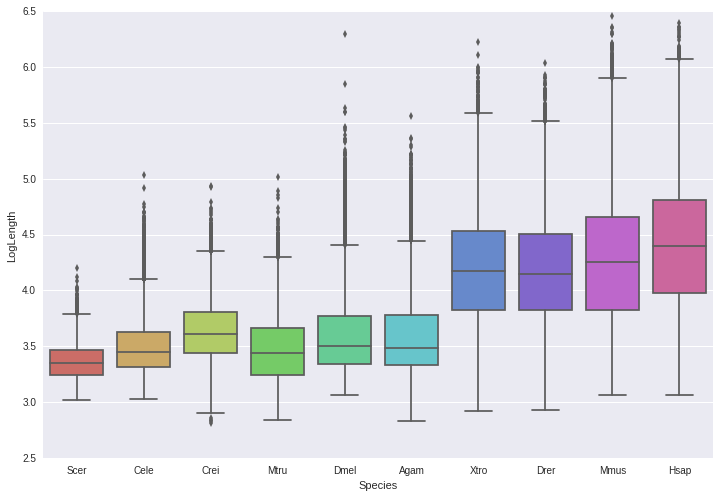

In [23]:
draw_plot(siloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))

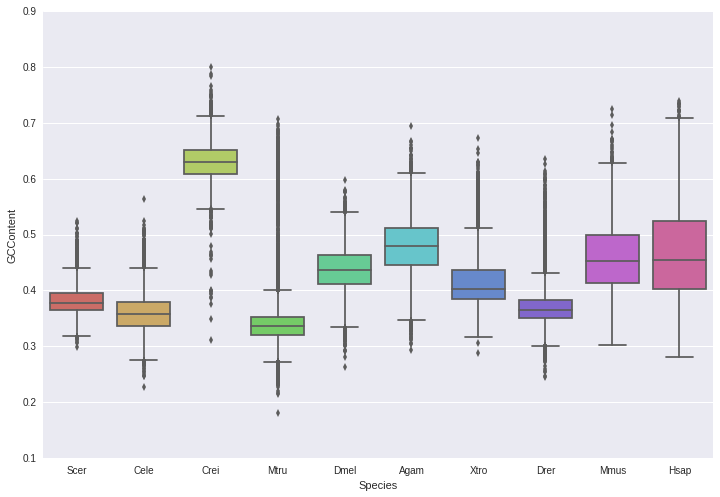

In [24]:
draw_plot(siloci, 'GCContent', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))

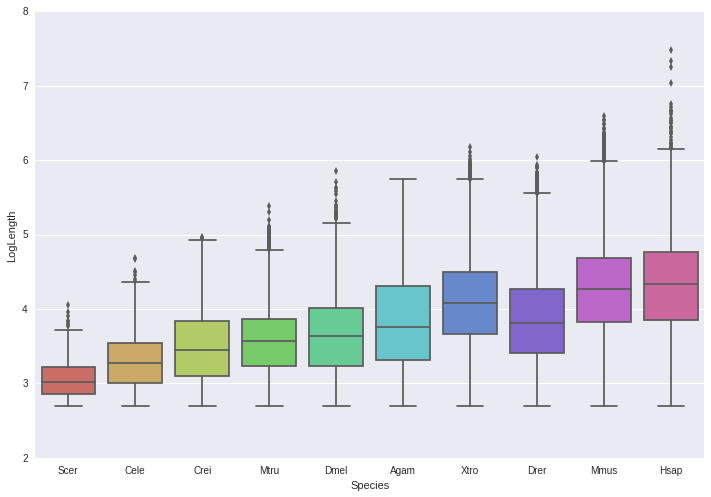

In [27]:
draw_plot(iiloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))

In [7]:
premrnas = load_data('species/*/*.pre-mrnas.tsv')

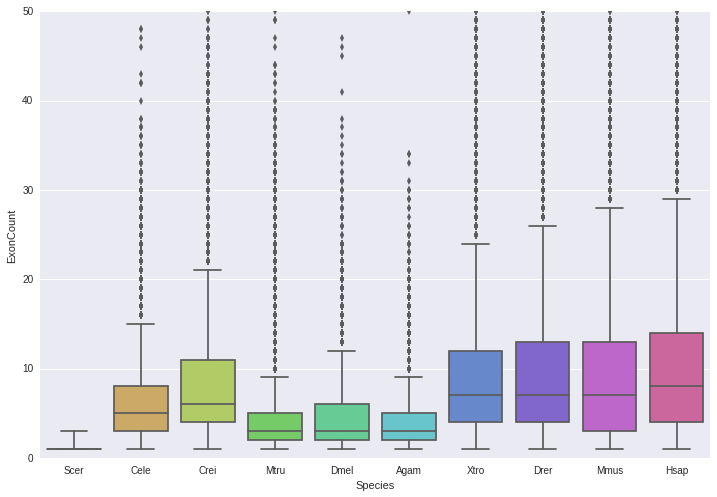

In [33]:
draw_plot(premrnas, 'ExonCount', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)), ylim=(0, 50))

In [41]:
single_exon_genes = premrnas[premrnas['ExonCount'] == 1].groupby('Species').size()
all_genes = premrnas.groupby('Species').size()
single_exon_genes / all_genes * 100

Species
Agam     9.240897
Cele     2.873164
Crei     7.883324
Dmel    15.441066
Drer     4.078184
Hsap     6.526543
Mmus    10.818101
Mtru    22.759892
Scer    95.426303
Xtro     6.232725
dtype: float64

In [34]:
all_genes

Species
Agam    12304
Cele    20152
Crei    14296
Dmel    13354
Drer    26041
Hsap    19459
Mmus    21501
Mtru    50444
Scer     5794
Xtro    21708
dtype: int64

In [39]:
single_exon_genes

Species
Agam     1137
Cele      579
Crei     1127
Dmel     2062
Drer     1062
Hsap     1270
Mmus     2326
Mtru    11481
Scer     5529
Xtro     1353
dtype: int64

In [43]:
miloci = load_data('species/*/*.miloci.tsv')

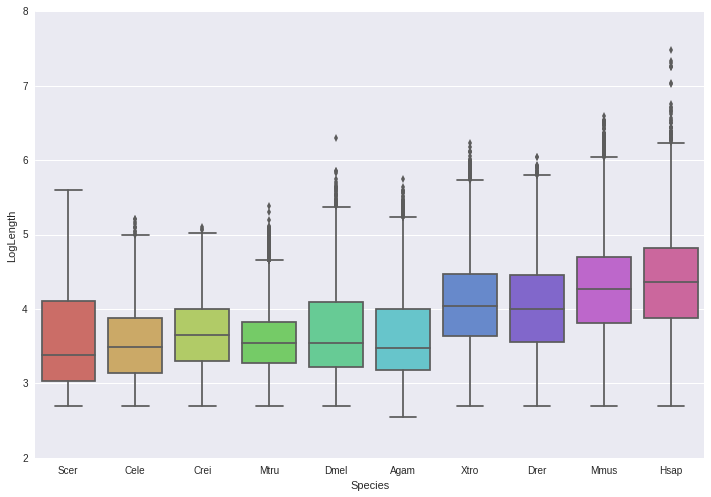

In [44]:
draw_plot(miloci, 'LogLength', 'Species', order=specieslist, palette=seaborn.color_palette("hls", len(specieslist)))